# Indonesian Hate Speech and Abusive Text
Pada persoalan kali ini akan dilakukan pengklasifikasian teks-teks yang bernada hate speech ke dalam beberapa kelompok yakni sebagai berikut:

* HS : hate speech label;
* Abusive : abusive language label;
* HS_Individual : hate speech targeted to an individual;
* HS_Group : hate speech targeted to a group;
* HS_Religion : hate speech related to religion/creed;
* HS_Race : hate speech related to race/ethnicity;
* HS_Physical : hate speech related to physical/disability;
* HS_Gender : hate speech related to gender/sexual orientation;
* HS_Other : hate related to other invective/slander;
* HS_Weak : weak hate speech;
* HS_Moderate : moderate hate speech;
* HS_Strong : strong hate speech.



In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/fwznbg/gemas/main/Indo_hatespeech/data.csv?token=ANMX7UX6X6QIIZU4HW7GISDBMGIMU'

#inisialisasi dataframe
#digunakan encoding latin-1 dikarenakan format data pada file terkait
df = pd.read_csv(url,encoding='latin-1')

In [ ]:
#preview dataset untuk 5 data teratas
df.head(5)


# Data yang dipakai merupakan data tweet, sehingga pengolahan lebih lanjut
# akan disesuaikan dengan pengolahan terhadap data tweet (biasanya bersifat informal)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
#cek shape dari dataset
print(df.shape)

(13169, 13)


## Persoalan akan dipersempit menjadi klasifikasi antara teks yang tergolong hate speech dengan teks yang bukan hate speech

In [ ]:
#melakukan pemangkasan fitur untuk mempersempit persoalan
df_ = df[['Tweet','HS']].copy()

In [ ]:
#melihat value count
print(df_.HS.value_counts())

0    7608
1    5561
Name: HS, dtype: int64


# Early Feature Extraction

In [ ]:
# Sebelum melakukan cleaning, ada beberapa hipotesis yang bisa dikembangkan berdasarkan pengalaman mengenai data hatespeech
# 1. Teks yang mengandung banyak huruf kapital lebih sering muncul di tweet hate speech (untuk menyatakan emosi)
# 2. Teks yang mengandung kata dengan uppercase semuanya biasanya juga menyatakan hate speech
# 3. Kata yang panjang cenderung mengarah ke hate speech (contoh : bodooohhh!)
# maka, akan dilakukan ekstraksi fitur sesuai hipotesis di atas

##----------FEATURE EXTRACTION/GENERATION----------##

#return number of capital characters contained in the text
def count_capital_chars(text):
    try:
        count=0
        for i in text:
            if i.isupper():
                count+=1
        return count
    except:
        return 0

'''
Uppercase/capital-related function

all --> all letter in the word are capital
any --> check wether any letter in the word is capital
begin --> check wether the word starts in capital letter

'''
def contain_capital(word):
    try:
        return not(word.islower())
    except:
        return False

def begins_in_capital(word):
    try:
        return word[0].isupper()
    except:
        return False

capital_function = {
    'all' : str.isupper,
    'any' : contain_capital,
    'begin' : begins_in_capital
}

#return the number of words containing capital letter as described by the how argument
def count_capital_words(text,how='all'):
    try:
        return sum(map(capital_function[how],text.split()))
    except:
        return 0

#simply the length of the entire text
def count_chars(text):
    try:
        return len(text)
    except:
        return 0

#return number of words contain in the text
def count_words(text):
    try:
        return len(text.split())
    except:
        return 0

def average_word_length(text):
    try:
        return count_chars(text)/count_words(text)
    except:
        return 0

## Sebelum melakukan ekstraksi, tampaknya ada beberapa stopwords yang bisa mengganggu sehingga harus dibersihkan terlebih dahulu

stopwordsnya adalah sebagai berikut:
- USER (mention)
- \n (new line)
- \x[0-9a-f]{2} (tampaknya ini emoji)
- #[^\s] (hashtags)
- URL
- &amp

In [ ]:
stopwords1 = [r'USER',r'\\n',r'\\x[0-9a-f]{2}',r'#[^\s]',r'URL',r'&amp']
df_['tweet_clean'] = df_['Tweet']
for s in stopwords1:
  df_['tweet_clean'] = df_['tweet_clean'].str.replace(s,' ')

In [ ]:
#ekstraksi fitur
df_['count_capital_char'] = df_.tweet_clean.apply(count_capital_chars)
df_['count_all_capital_word'] = df_.tweet_clean.apply(lambda x : count_capital_words(x,how='all'))
df_['count_any_capital_word'] = df_.tweet_clean.apply(lambda x : count_capital_words(x,how='any'))
df_['average_word_length'] = df_.tweet_clean.apply(average_word_length)

In [ ]:
import matplotlib.pyplot as plt
colors = np.array(['r','b'])
hs = df_['HS']
cmap = colors[hs.values]

#untuk membuktikan hipotesis awal, akan dicek melalui visual dan deskripsi statistik
#fitur yang diperoleh

def analysis_feature_extraction(col):
  plt.scatter(df_['HS'],df_[col],color=cmap,alpha=0.1)
  plt.title(col)
  plt.show()

  print('deskripsi ' + col + ' untuk non hate speech')
  print(df_[df_['HS'] == 0][col].describe())
  print()
  print('deskripsi ' + col + ' untuk hate speech')
  print(df_[df_['HS'] == 1][col].describe())

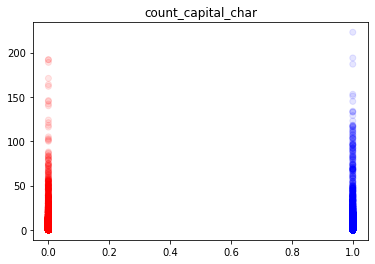

deskripsi count_capital_char untuk non hate speech
count    7608.000000
mean        6.409700
std        11.278633
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       192.000000
Name: count_capital_char, dtype: float64

deskripsi count_capital_char untuk hate speech
count    5561.000000
mean        7.497393
std        14.814684
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       223.000000
Name: count_capital_char, dtype: float64


In [ ]:
analysis_feature_extraction('count_capital_char')

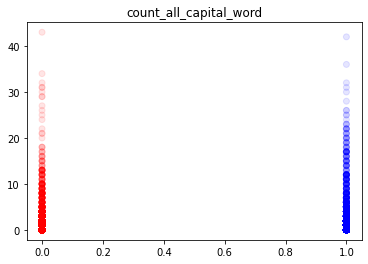

deskripsi count_all_capital_word untuk non hate speech
count    7608.000000
mean        0.687960
std         2.094244
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        43.000000
Name: count_all_capital_word, dtype: float64

deskripsi count_all_capital_word untuk hate speech
count    5561.000000
mean        1.061500
std         2.795776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        42.000000
Name: count_all_capital_word, dtype: float64


In [ ]:
analysis_feature_extraction('count_all_capital_word')

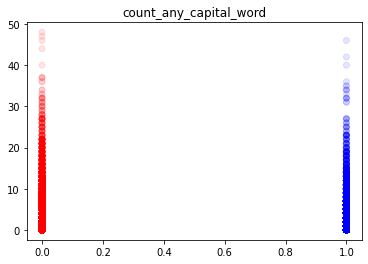

deskripsi count_any_capital_word untuk non hate speech
count    7608.000000
mean        4.866193
std         5.108933
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        48.000000
Name: count_any_capital_word, dtype: float64

deskripsi count_any_capital_word untuk hate speech
count    5561.000000
mean        4.038842
std         4.232828
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        46.000000
Name: count_any_capital_word, dtype: float64


In [ ]:
analysis_feature_extraction('count_any_capital_word')

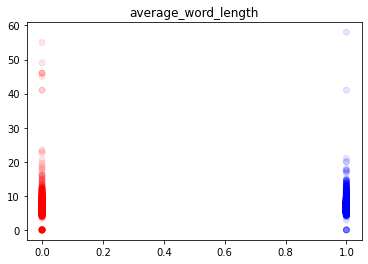

deskripsi average_word_length untuk non hate speech
count    7608.000000
mean        6.703095
std         1.835070
min         0.000000
25%         5.948381
50%         6.529412
75%         7.214286
max        55.000000
Name: average_word_length, dtype: float64

deskripsi average_word_length untuk hate speech
count    5561.000000
mean        6.785797
std         1.563420
min         0.000000
25%         6.000000
50%         6.571429
75%         7.250000
max        58.000000
Name: average_word_length, dtype: float64


In [ ]:
analysis_feature_extraction('average_word_length')

In [ ]:
#terdapat data yang memiliki average word length = 0
df_[df_['average_word_length'] == 0]

,Tweet,HS,tweet_clean,count_capital_char,count_all_capital_word,count_any_capital_word,average_word_length
182,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
318,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
377,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
490,USER USER USER USER USER USER USER USER USER U...,0,...,0,0,0,0.0
1282,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
1565,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
1840,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
1972,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
2514,USER USER USER USER USER USER USER USER USER U...,0,,0,0,0,0.0
2719,USER USER USER USER USER USER USER USER USER U...,1,,0,0,0,0.0


In [ ]:
#hilangkan data yang memiliki average word length == 0
df_ = df_[df_['average_word_length'] > 0]

## Kemungkinan hanya fitur capital char dan all capital word yang akan diperhitungkan, namun fitur lain akan tetap dipakai, hanya saja jika hasilnya kurang baik maka hanya capital char yang akan dipakai

## Selanjutnya akan dilakukan cleaning pada kolom Tweet, data yang diclean akan disimpan di dalam kolom bernama tweet_clean

In [ ]:
#case-folding, tidak ada keperluan untuk membiarkan uppercase
#huruf kapital akan menyebabkan sparsity issue di kemudian

df_ ['tweet_clean'] = df_['tweet_clean'].str.lower()

#lakukan trim space dan newline serta tab pada teks di awal dan akhir teks

df_['tweet_clean'] = df_['tweet_clean'].str.strip()

In [ ]:
#hilangkan pengulangan karakter (contoh : aaaappaaaaa --> apa)
import re

#fungsi normalisasi teriak/multiple character
def teriak_normalization(text):
    return re.compile(r'(.)\1{2,}', re.IGNORECASE).sub(r'\1', text)

In [ ]:
#aplikasikan fungsi normalisasi teriak
df_['tweet_clean'] = df_.tweet_clean.apply(teriak_normalization)

In [ ]:
import string

#remove punctuation/tanda baca

punct = "["
for s in string.punctuation:
  punct += s
punct += "]"

In [ ]:
df_['tweet_clean'] = df_.tweet_clean.str.replace(punct,' ')

In [ ]:
#remove angka serta multiple space kemudian strip kembali

df_['tweet_clean'] = df_.tweet_clean.str.replace(r'3x',' ')
df_['tweet_clean'] = df_.tweet_clean.str.replace(r'\d',' ')
df_['tweet_clean'] = df_.tweet_clean.str.replace(r'\s+',' ')
df_['tweet_clean'] = df_.tweet_clean.str.strip()

In [ ]:
df_.sample(5)

,Tweet,HS,tweet_clean,count_capital_char,count_all_capital_word,count_any_capital_word,average_word_length
761,RT USER: USER Burma dan Budha memang teroris s...,1,rt burma dan budha memang teroris sebenarnya,4,1,4,6.125000
1522,"USER USER Islam ya Islam, gak Ada Islam nusant...",0,islam ya islam gak ada islam nusantara kriaten...,8,0,8,6.562500
896,USER Knp nun? Ada bom?',0,knp nun ada bom,2,0,2,5.000000
9130,Buat MCA sumbu pendek wahabi bumi datar n yg n...,1,buat mca sumbu pendek wahabi bumi datar n yg n...,5,1,3,5.562500
2720,USER USER Tentunya untuk fasilitas / kepenting...,0,tentunya untuk fasilitas kepentingan negara bu...,9,1,5,8.090909


## Melakukan normalisasi dengan merubah kata-kata yang tidak baku menjadi baik dan benar

In [ ]:
url_kamus_alay = 'https://raw.githubusercontent.com/fwznbg/gemas/main/kamus_alay_nasigoreng/kamus_alay_nasigoreng.csv?token=ANMX7UXYAQAU3IPJVD2FQZ3BMGIQW'

kamus_alay = pd.read_csv(url_kamus_alay,header=None,encoding='latin-1')

In [ ]:
#mengecek apakah di bagian kiri tabel unik semua
print(len(kamus_alay[0].unique()) == len(kamus_alay))

True


In [ ]:
#mengubah index kamus_alay
kamus_alay.index = kamus_alay[0]

In [ ]:
#fungsi normalisasi
def normalize_alay(text):
  tokens = text.split()
  for i in range(len(tokens)):
    if tokens[i] in kamus_alay[0].values:
      tokens[i] = kamus_alay.loc[tokens[i],1]
  return " ".join(tokens)

In [ ]:
import time

In [ ]:
#pengaplikasian fungsi normalisasi
start = time.time()
df_['tweet_cn'] = df_.tweet_clean.apply(normalize_alay)
timelapse = time.time() - start

print("Time : " + str(timelapse) + " s")

Time : 72.40465450286865 s


In [ ]:
df_

,Tweet,HS,tweet_clean,count_capital_char,count_all_capital_word,count_any_capital_word,average_word_length,tweet_cn
0,- disaat semua cowok berusaha melacak perhatia...,1,disaat semua cowok berusaha melacak perhatian ...,0,0,4,5.520000,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,rt siapa yang telat ngasih tau elu edan sarap ...,2,1,2,5.700000,rt siapa yang terlambat memberikan tahu kamu e...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,kadang aku berfikir kenapa aku tetap percaya p...,7,0,8,6.864865,kadang aku berpikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,aku itu aku ku tau matamu sipit tapi diliat da...,49,13,13,5.153846,aku itu aku ku tahu matamu sipit tapi dilihat ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,kaum cebong kapir udah keliatan dongoknya dari...,1,0,1,6.916667,kaum cebong kafir sudah kelihatan dongoknya da...
...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,jangan asal ngomong ndasmu congor lu yg sekate...,0,0,0,6.444444,jangan asal bicara ndasmu mulut kamu yang seka...
13165,USER Kasur mana enak kunyuk',0,kasur mana enak kunyuk,1,0,1,6.250000,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,hati hati bisu g lagi bosan huft,1,0,3,5.000000,hati hati bisu tidak lagi bosan mengeluh
13167,USER USER USER USER Bom yang real mudah terdet...,0,bom yang real mudah terdeteksi bom yang terkub...,3,0,3,6.833333,bom yang real mudah terdeteksi bom yang terkub...


In [ ]:
#removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

sw = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopword(text):
  tokens = text.split()
  tokens = [t for t in tokens if t not in sw]
  return " ".join(tokens)

In [ ]:
start = time.time()
df_['tweet_cnsw'] = df_.tweet_cn.apply(remove_stopword)
timelapse = time.time() - start
print("Time : " + str(timelapse) + " s")

Time : 2.2806098461151123 s


In [ ]:
df_[['Tweet','tweet_cnsw']]

,Tweet,tweet_cnsw
0,- disaat semua cowok berusaha melacak perhatia...,cowok berusaha melacak perhatian lantas remehk...
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt terlambat edan sarap bergaul cigax jifla ca...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang berpikir percaya tuhan jatuh berkali ka...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,ku matamu sipit
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir dongoknya dungu tertawa
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,bicara ndasmu mulut sekate anjing
13165,USER Kasur mana enak kunyuk',kasur enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu bosan mengeluh
13167,USER USER USER USER Bom yang real mudah terdet...,bom real mudah terdeteksi bom terkubur dahsyat...


## stemming ditunda dulu karena lama

## Transformasi

# Modeling

In [ ]:
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

def nb_pipeline(nb,df,xcol,ycol,vect):
  X_train, X_test, y_train, y_test = train_test_split(df[xcol], df[ycol], test_size=0.2, random_state=42)
  X_train_vect = vect.fit_transform(X_train)
  X_test_vect = vect.transform(X_test)
  nb.fit(X_train_vect.toarray(),y_train)
  y_pred_test = nb.predict(X_test_vect)
  print(classification_report(y_test,y_pred_test))
  
  return nb, vect, X_train_vect, X_test_vect, y_train, y_test

In [ ]:
mnb_unstem, cntvect_unstem, X_train_vect_1, X_test_vect_1, y_train_1, y_test_1 = nb_pipeline(naive_bayes.MultinomialNB(),
                                                                               df_,
                                                                               'tweet_cnsw',
                                                                               'HS',
                                                                               CountVectorizer())

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1524
           1       0.75      0.85      0.80      1103

    accuracy                           0.82      2627
   macro avg       0.82      0.82      0.82      2627
weighted avg       0.83      0.82      0.82      2627



In [ ]:
!pip install nlp-id
#https://github.com/kumparan/nlp-id

     |████████████████████████████████| 7.9 MB 18.8 MB/s 
     |████████████████████████████████| 7.0 MB 24.3 MB/s 
     |████████████████████████████████| 1.5 MB 49.0 MB/s 
  Created wheel for nlp-id: filename=nlp_id-0.1.12.0-py3-none-any.whl size=8074105 sha256=d5c9139c3bbf61ba351982d1a63bd23e5ef5bf5c9f4f4ea55ca743e02d6a7efd
  Stored in directory: /root/.cache/pip/wheels/b2/50/48/da59531125bd94f48dfe66140f41d8fd8a4f04062050375013
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449920 sha256=ac7dcf1652bf793f71436a0fc60f53936eb4a46b9e674917c3fe7601ee400c0e
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=9fdc3ecfb7b55229241a166b8ae6cb5a60bb337d069871430db695b866856950
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built nlp-id nltk wget
  Attempting uninstall:

In [ ]:
from nlp_id.lemmatizer import Lemmatizer 
#misal lemmatize
lemmatizer = Lemmatizer()
start = time.time()

df_['tweet_cnswl'] = df_.tweet_cnsw.apply(lemmatizer.lemmatize)

timelapse = time.time() - start
print("Time : " + str(timelapse) + " s")

Time : 0.39183950424194336 s


In [ ]:
df_[['tweet_cnsw','tweet_cnswl']]

,tweet_cnsw,tweet_cnswl
0,cowok berusaha melacak perhatian lantas remehk...,cowok usaha lacak perhati lantas remeh perhati...
1,rt terlambat edan sarap bergaul cigax jifla ca...,rt lambat edan sarap gaul cigax jifla calis licew
2,kadang berpikir percaya tuhan jatuh berkali ka...,kadang pikir percaya tuhan jatuh kali kali kad...
3,ku matamu sipit,ku mata sipit
4,kaum cebong kafir dongoknya dungu tertawa,kaum cebong kafir dongok dungu tertawa
...,...,...
13164,bicara ndasmu mulut sekate anjing,bicara ndasmu mulut kate anjing
13165,kasur enak kunyuk,kasur enak kunyuk
13166,hati hati bisu bosan mengeluh,hati hati bisu bosan keluh
13167,bom real mudah terdeteksi bom terkubur dahsyat...,bom real mudah deteksi bom kubur dahsyat ledak...


In [ ]:
mnb_lemma, cntvect_lemma, X_train_vect_2, X_test_vect_2, y_train_2, y_test_2 = nb_pipeline(naive_bayes.MultinomialNB(),
                                                                               df_,
                                                                               'tweet_cnswl',
                                                                               'HS',
                                                                               CountVectorizer())

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1524
           1       0.75      0.84      0.79      1103

    accuracy                           0.81      2627
   macro avg       0.81      0.82      0.81      2627
weighted avg       0.82      0.81      0.81      2627



In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 29.1 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#misal stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
start = time.time()

df_['tweet_cnsws'] = df_.tweet_cnsw.apply(stemmer.stem)

timelapse = time.time() - start
print("Time : " + str(timelapse) + " s")

Time : 1327.4465670585632 s


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#unstem

param_grid_svc = {
    'kernel' : ['rbf','poly']
}

svc_grid = GridSearchCV(SVC(random_state=42), param_grid_svc, refit = True, verbose = 3)

In [ ]:
tfidf = TfidfVectorizer()
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_['tweet_cnsw'], df_['HS'], test_size=0.2, random_state=42)
X_train_vect_3 = tfidf.fit_transform(X_train_3)
X_test_vect_3 = tfidf.transform(X_test_3)

start = time.time()
svc_grid.fit(X_train_vect_3,y_train_3)
timelapse = time.time() - start

print("Time : " + str(timelapse) + " s")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... kernel=rbf, score=0.822, total=  11.3s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] .......................... kernel=rbf, score=0.817, total=  11.4s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.8s remaining:    0.0s


[CV] .......................... kernel=rbf, score=0.837, total=  11.5s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.833, total=  13.6s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.843, total=  11.4s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.710, total=  14.6s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.707, total=  14.9s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.716, total=  14.9s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.717, total=  14.6s
[CV] kernel=poly .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.2min finished


Time : 151.15856623649597 s


In [ ]:
# print best parameter after tuning
print(svc_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svc_grid.best_estimator_)

{'kernel': 'rbf'}
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
y_pred_test_3 = svc_grid.predict(X_test_vect_3)
print(classification_report(y_test_3,y_pred_test_3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1524
           1       0.85      0.76      0.80      1103

    accuracy                           0.84      2627
   macro avg       0.85      0.83      0.84      2627
weighted avg       0.84      0.84      0.84      2627



In [ ]:
svc_grid_lemma = GridSearchCV(SVC(random_state=42), param_grid_svc, refit = True, verbose = 3)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_['tweet_cnswl'], df_['HS'], test_size=0.2, random_state=42)
X_train_vect_4 = tfidf.fit_transform(X_train_4)
X_test_vect_4 = tfidf.transform(X_test_4)

start = time.time()
svc_grid_lemma.fit(X_train_vect_4,y_train_4)
timelapse = time.time() - start

print("Time : " + str(timelapse) + " s")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... kernel=rbf, score=0.826, total=   9.6s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV] .......................... kernel=rbf, score=0.825, total=   9.6s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


[CV] .......................... kernel=rbf, score=0.832, total=   9.5s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.839, total=   9.6s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.843, total=   9.5s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.723, total=  14.2s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.722, total=  14.4s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.736, total=  14.2s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.746, total=  14.1s
[CV] kernel=poly .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished


Time : 131.79136633872986 s


In [ ]:
# print best parameter after tuning
print(svc_grid_lemma.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svc_grid_lemma.best_estimator_)

{'kernel': 'rbf'}
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
y_pred_test_4 = svc_grid_lemma.predict(X_test_vect_4)
print(classification_report(y_test_4,y_pred_test_4))

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1524
           1       0.84      0.76      0.80      1103

    accuracy                           0.84      2627
   macro avg       0.84      0.83      0.83      2627
weighted avg       0.84      0.84      0.84      2627



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators' : [100,200,300]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, refit = True, verbose = 3)

In [ ]:
start = time.time()
rf_grid.fit(X_train_vect_3,y_train_3)

timelapse = time.time() - start

print("Time : " + str(timelapse) + " s")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.833, total=  23.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.832, total=  22.7s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.8s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.833, total=  22.9s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.830, total=  22.6s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.845, total=  23.2s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.838, total=  45.9s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.834, total=  45.4s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.833, total=  45.7s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.831, total=  45.3s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 11.5min finished


Time : 721.7874000072479 s


In [ ]:
# print best parameter after tuning
print(rf_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(rf_grid.best_estimator_)

{'n_estimators': 200}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
y_pred_test_5 = rf_grid.predict(X_test_vect_3)
print(classification_report(y_test_3,y_pred_test_5))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1524
           1       0.83      0.78      0.81      1103

    accuracy                           0.84      2627
   macro avg       0.84      0.83      0.84      2627
weighted avg       0.84      0.84      0.84      2627



## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost = XGBClassifier()

In [ ]:
xgboost.fit(X_train_vect_3,y_train_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_test_6 = xgboost.predict(X_test_vect_3)
print(classification_report(y_test_3,y_pred_test_6))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1524
           1       0.88      0.55      0.68      1103

    accuracy                           0.78      2627
   macro avg       0.81      0.75      0.76      2627
weighted avg       0.80      0.78      0.77      2627

